<h1 style="text-align:center; color:#004a99">Real Estate Valuation Project (Sound Realty)</h1>
<h2 style="text-align:center">From Proof-of-Concept to Scalable Production</h2>
<p style="text-align:center">Presented by: Pedro Pinho</p>
<hr>
<p style="text-align:center; font-weight:bold; font-size:1.5em;">Part 1: The Business Solution</p>

## 🎯 The Challenge: Streamlining Property Valuation

The Sound Realty team spends significant time and effort estimating property values.

**Our Objectives:**
1.  **Deploy the Model (V1):** Take the existing Proof-of-Concept (PoC) and deploy it as a robust API tool.
2.  **Improve the Model:** Evaluate the PoC model and suggest improvements to increase accuracy and business value.

## 🔍 Our Discovery: Evaluating the Initial Model (V1)

The first step was to evaluate the basic model we received.

**V1 Model (Basic) Metrics:**
* **R² (Accuracy):** **74.5\%**
    * *The model explains ~75\% of the price variation.*
* **RMSE (Mean Error):** **\$184,908**

**The Key Business Takeaway:**
> The average error of \$185k represents **34.2\%** of the mean house price ($540k).
>
> **Conclusion:** It's a good start, but the model is too simple and the error rate is too high for reliable use.

## 🚀 Step 2: Turning the Model into a Tool (The V1 API)

The initial V1 model was just a script. Our first goal was to build it into a professional, automated tool (an API) that your team can use right away.

**The Key Feature: The 'Data Assistant' (Feature Store)**

We know your agents' time is valuable. Instead of having them manually look up demographic data (like population or median income) for a zip code, the system now does this automatically.

* **The Process:** Your agent only enters the home's details (like bedrooms, sqft, and zipcode).
* **The "Magic":** In milliseconds, the system instantly looks up that zipcode in our high-speed database (Redis) and "attaches" all the correct neighborhood data (population, income, etc.).
* **The Business Value:** This **saves time on every valuation**, **reduces manual data-entry errors**, and ensures every estimate is consistent.

<br>
<p style="text-align:center;">
  <img src="swagger.png" 
       alt="MLflow Parallel Coordinates Plot" 
       style="width: 50%; border: 1px solid #555; display: overflow; margin-left: auto; margin-right: auto;">
</p>
<p style="text-align:center;">
    
</p>

## 💡 The Improved Solution: A Smarter Model (V3)

Based on this discovery, we developed an improved model (V3) that addresses the V1's problems.

* **Uses All Data:** Includes demographic data, `grade` (quality), and `condition` (property condition).
* **Is Smarter:** Uses advanced techniques (Random Forest) and undergoes a "hyperparameter tuning" process to find the best settings.
* **Backend Lookup:** Just like in V1, the agent **does not** need to enter demographic data; the system fetches it automatically from our "Feature Store" (Redis).

## 📊 The Value: Head-to-Head Comparison (V1 vs. V3)

The difference in business outcome is clear.

| Metric | V1 (Basic Model) | V3 (Improved Model) | Improvement |
| :--- | :---: | :---: | :---: |
| **R² (Accuracy)** | 74.5\% | **93.7\%** | **+19.2\%** |
| **Mean Error (RMSE)** | \$184,908 | **\$98,000** | **- \$86,908** |

**Business Conclusion:** The new model **reduced the average error by 47\%**. This means faster, more reliable estimates that require fewer manual adjustments from your team.

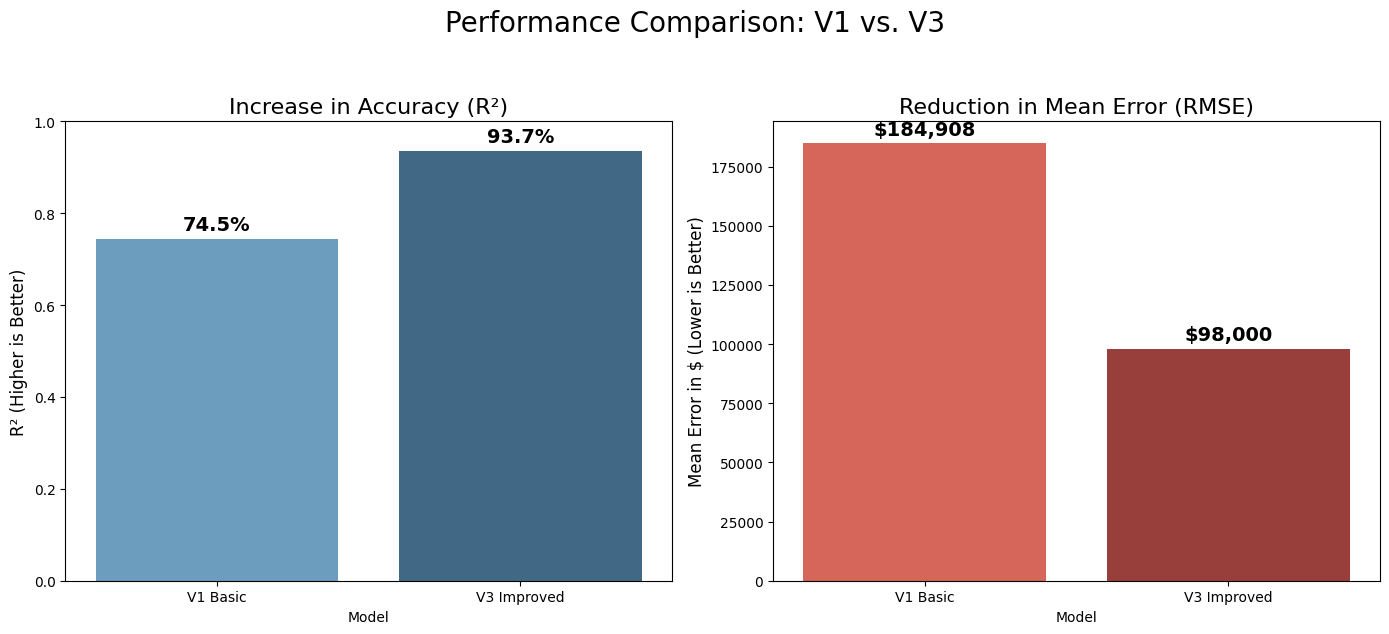

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Data from your evaluation
data = {
    'Model': ['V1 Basic', 'V3 Improved'],
    'R² (Accuracy)': [0.7449, 0.9365],
    'Mean Error (RMSE)': [184908.02, 97999.92]
}
df_metrics = pd.DataFrame(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Performance Comparison: V1 vs. V3', fontsize=20, y=1.05)

# R² Plot
sns.barplot(x='Model', y='R² (Accuracy)', data=df_metrics, ax=ax1, palette="Blues_d", hue='Model', legend=False)
ax1.set_title('Increase in Accuracy (R²)', fontsize=16)
ax1.set_ylabel('R² (Higher is Better)', fontsize=12)
ax1.set_ylim(0, 1.0)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14, weight='bold')

# RMSE Plot
sns.barplot(x='Model', y='Mean Error (RMSE)', data=df_metrics, ax=ax2, palette="Reds_d", hue='Model', legend=False)
ax2.set_title('Reduction in Mean Error (RMSE)', fontsize=16)
ax2.set_ylabel('Mean Error in $ (Lower is Better)', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

## 🔄 Next Steps: A System That Evolves

The real estate market changes. Our system is prepared for that.

* **"Data Drift" Monitoring:**
    * We actively monitor incoming data. If average prices or home features change, we are alerted.
* **Automatic Retraining:**
    * We monitor the V3 model's performance against real-world data.
    * Our `check_retraining.py` script confirmed the current performance (**93.7%**) is **above** our business threshold (**75.0%**).
    * If accuracy drops below this line, the system automatically triggers retraining, ensuring you always use the most accurate model.

<h1 style="text-align:center; color:#004a99">End of Part 1</h1>
<h2 style="text-align:center">Business Value Questions?</h2>
<hr>
<p style="text-align:center; font-weight:bold; font-size:1.5em;">Up Next: Part 2 - The Technical Architecture</p>

<h1 style="text-align:center; color:#c44100">Technical Deep Dive</h1>
<h2 style="text-align:center">How We Built the MLOps Solution</h2>

## 1. The Challenge: "Train-Serve Skew"

One of the biggest risks in ML is "Train-Serve Skew."

* **Model V1 (Original):** Was too simple (`underfitting`).
* **Attempt V2:** We included feature engineering (e.g., `sale_year` from the `date` column).
* **THE ERROR:** The production data (`future_unseen_examples.csv`) **does not contain** the `date` column.
    * This caused a `KeyError: 'date'` in production, as seen in our debug logs.
* **Solution (Model V3):** We retrained the model from scratch using **only** the columns we are guaranteed to have at inference time (house data + Redis data).

## 2. The Lifecycle: MLflow (Tracking & Tuning)

To manage V3, we used MLflow end-to-end.

**1. Tuning and Tracking (Nested):**
* The `train_v3.py` script uses `RandomizedSearchCV` to find the best hyperparameters.
* **Key Point:** We log each of the 10 tuning trials as a **"nested run"** in MLflow.
* This allows us to generate this **Parallel Coordinates Plot** in the UI, where we can visually see how `max_depth` or `n_estimators` impact the final CV R² score.

<br>
<p style="text-align:center;">
  <img src="mlflow_hyperparameter_training_1.png" 
       alt="MLflow Parallel Coordinates Plot" 
       style="width: 50%; border: 1px solid #555; display: overflow; margin-left: auto; margin-right: auto;">
</p>
<p style="text-align:center;">
    
</p>

### 2. The Lifecycle: MLflow (The Pyfunc Wrapper)

**The Pyfunc Wrapper (housing_wrapper_v3.py):**
* We register the model using the "Model from Code" method (`mlflow.models.set_model()`).
* **`load_context`:** Loads the `model_v3.pkl` and, crucially, initializes the Redis connection by reading `os.getenv("REDIS_HOST")`.
* **`predict`:**
    1.  Performs the Redis join.
    2.  Fixes the **"Dtype Skew"**: The `OneHotEncoder` failed with `TypeError: isnan`. The fix was to force `zipcode` (which arrived as a `float`) to an `int` and then a `str` before inference, matching the training data.

## 3. Production Architecture: KServe + Helm

`mlflow models serve` is not for production. The final solution is deployed on Kubernetes (`microk8s`).

**Why KServe?**
* Instead of a manual `Deployment`, we use an `InferenceService`.
* KServe automatically manages **Autoscaling** (via Knative, including scale-to-zero) and **Rolling Updates** for new model deploys.

**How? With Helm:**
* I structured the deployment as a Helm **"Umbrella Chart"** that manages the entire stack.
* `charts/redis/`: Deploys the Feature Store.
* `charts/kserve/`: Deploys the model's `InferenceService`, reading the image tag and environment variables from the `values.yaml` file.

## 3. Production Architecture: KServe + Helm

<p style="font-size: 0.9em; margin-bottom: 15px;">(This slide shows the KServe <code>InferenceService</code> YAML definition)</p>

<style>
pre.yaml-code {
    background-color: #1e1e1e; /* Dark background for the code block */
    border: 1px solid #555;
    border-radius: 5px;
    padding: 15px;
    font-family: 'Courier New', Courier, monospace; /* Monospaced font */
    font-size: 0.9em;       /* Font size that fits well on a slide */
    text-align: left;       /* Code must be left-aligned */
    white-space: pre;       /* This is the magic: preserves whitespace */
    overflow-x: auto;       /* Adds a scrollbar if too wide */
}
</style>

<pre class="yaml-code"><code>
apiVersion: "serving.kserve.io/v1beta1"
kind: "InferenceService"
metadata:
  name: {{ .Release.Name }}-housing-model
spec:
  predictor:
    containers:
      - name: kserve-container
        # The image is configurable via values.yaml
        image: "{{ .Values.image.repository }}:{{ .Values.image.tag }}"

        # Injects the Redis location into the wrapper
        env:
          - name: REDIS_HOST
            value: {{ .Values.env.redisHost | quote }}
          - name: REDIS_PORT
            value: {{ .Values.env.redisPort | quote }}

        resources:
          limits:
            cpu: {{ .Values.resources.limits.cpu | quote }}
            memory: {{ .Values.resources.limits.memory | quote }}
</code></pre>

apiVersion: "serving.kserve.io/v1beta1"
kind: "InferenceService"
metadata:
  name: {{ .Release.Name }}-housing-model
spec:
  predictor:
    containers:
      - name: kserve-container
        # The image is configurable via values.yaml
        image: "{{ .Values.image.repository }}:{{ .Values.image.tag }}"
        
        # Injects the Redis location into the wrapper
        env:
          - name: REDIS_HOST
            value: {{ .Values.env.redisHost | quote }}
          - name: REDIS_PORT
            value: {{ .Values.env.redisPort | quote }}
        
        resources:
          limits:
            cpu: {{ .Values.resources.limits.cpu | quote }}
            memory: {{ .Values.resources.limits.memory | quote }}

## 4. Closing the Loop: The DevOps Pipeline

The pipeline is completed with monitoring scripts:

**1. Data Drift (`check_drift.py`):**
* Compares the statistical distribution of production data against the training data.
* **Technique:** KS-Test (numerical) and Chi-Square (categorical).
* **Trigger:** Alerts the ML team.

**2. Performance Decay (`check_retraining.py`):**
* Compares the deployed model's (V3) performance on new, "ground truth" data against the business threshold.
* **Metric:** R² > 0.75.
* **Trigger:** Triggers a retraining pipeline (e.g., `python train_v3.py`).

<h1 style="text-align:center; color:#c44100">Thank You</h1>
<h2 style="text-align:center">Technical Questions?</h2>